# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
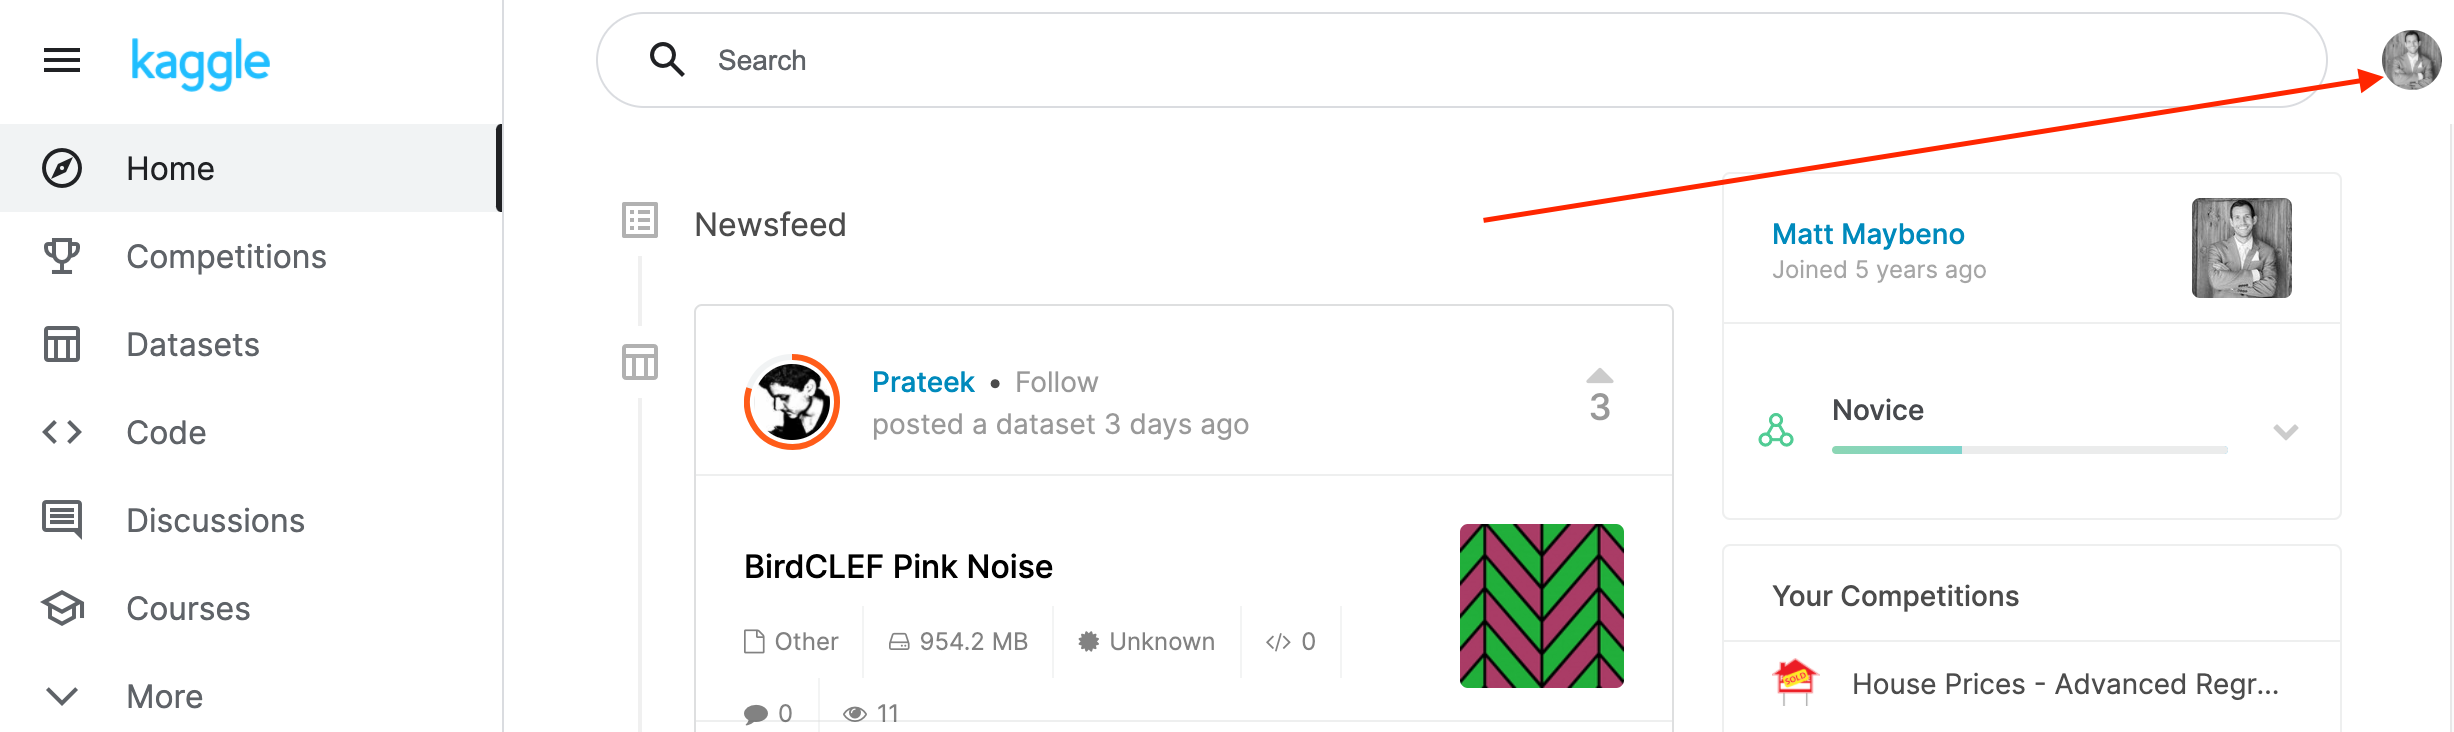
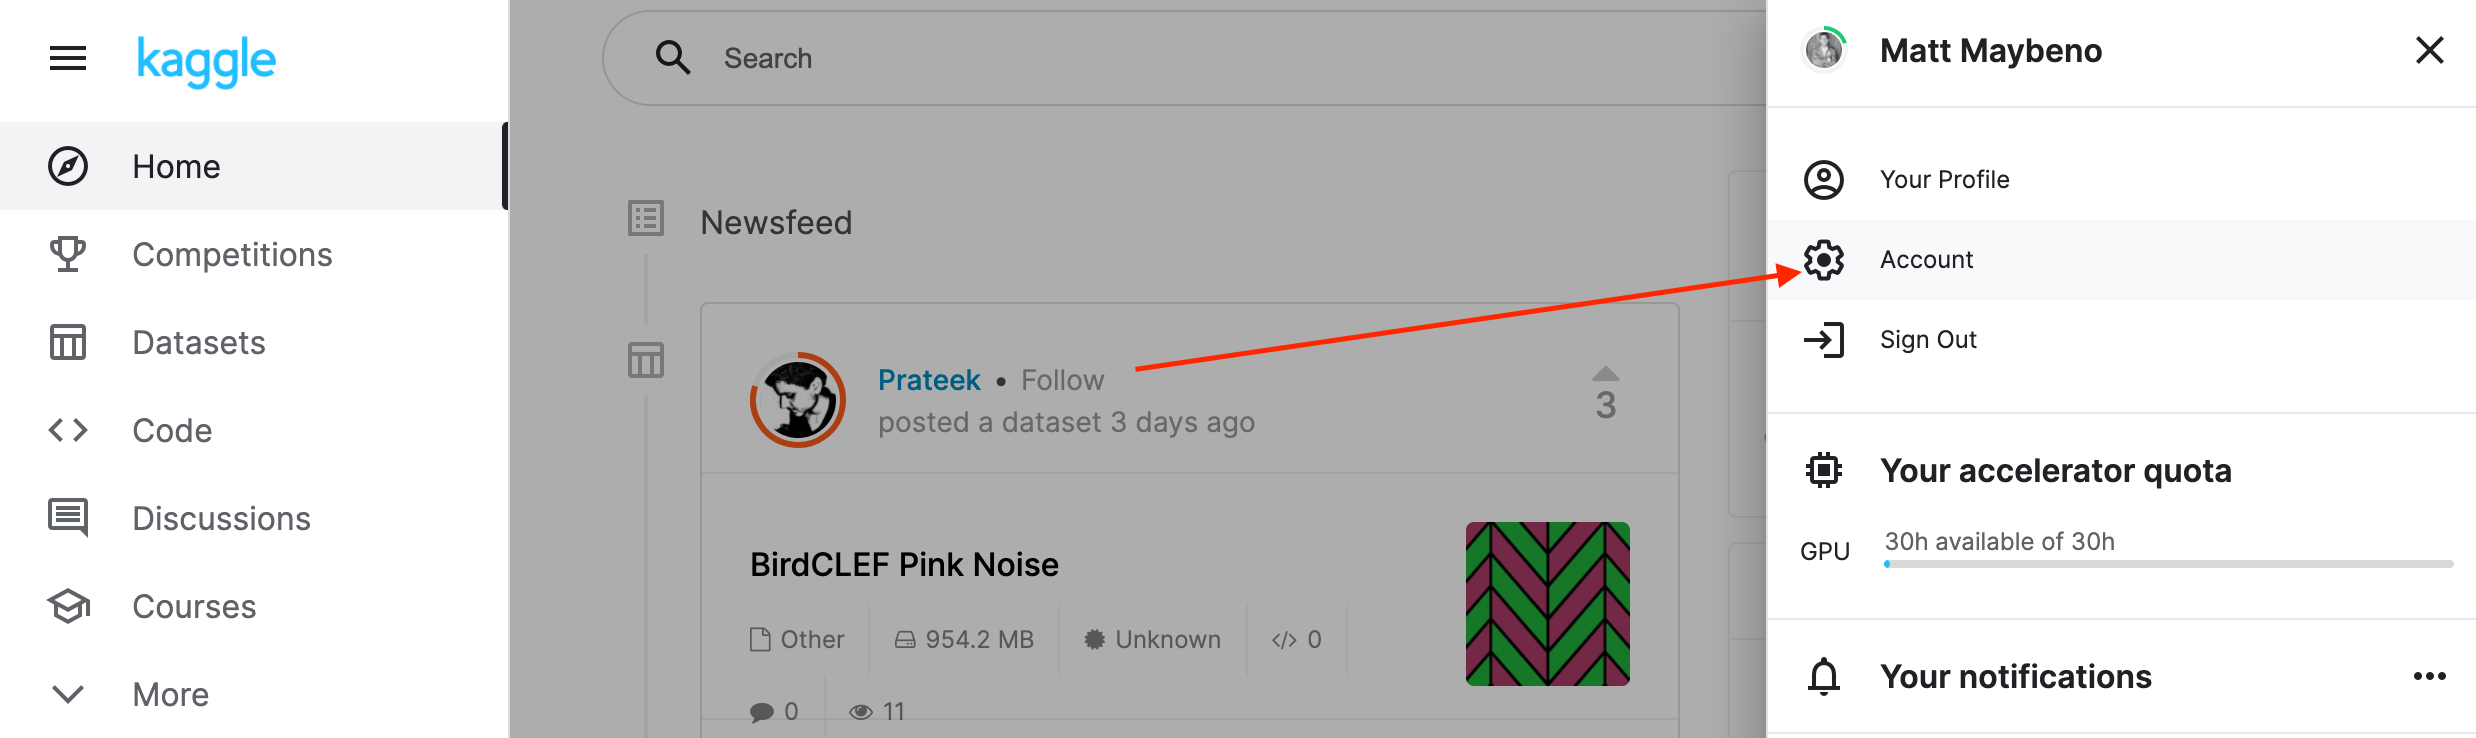
2. Scroll down to API and click Create New API Token.
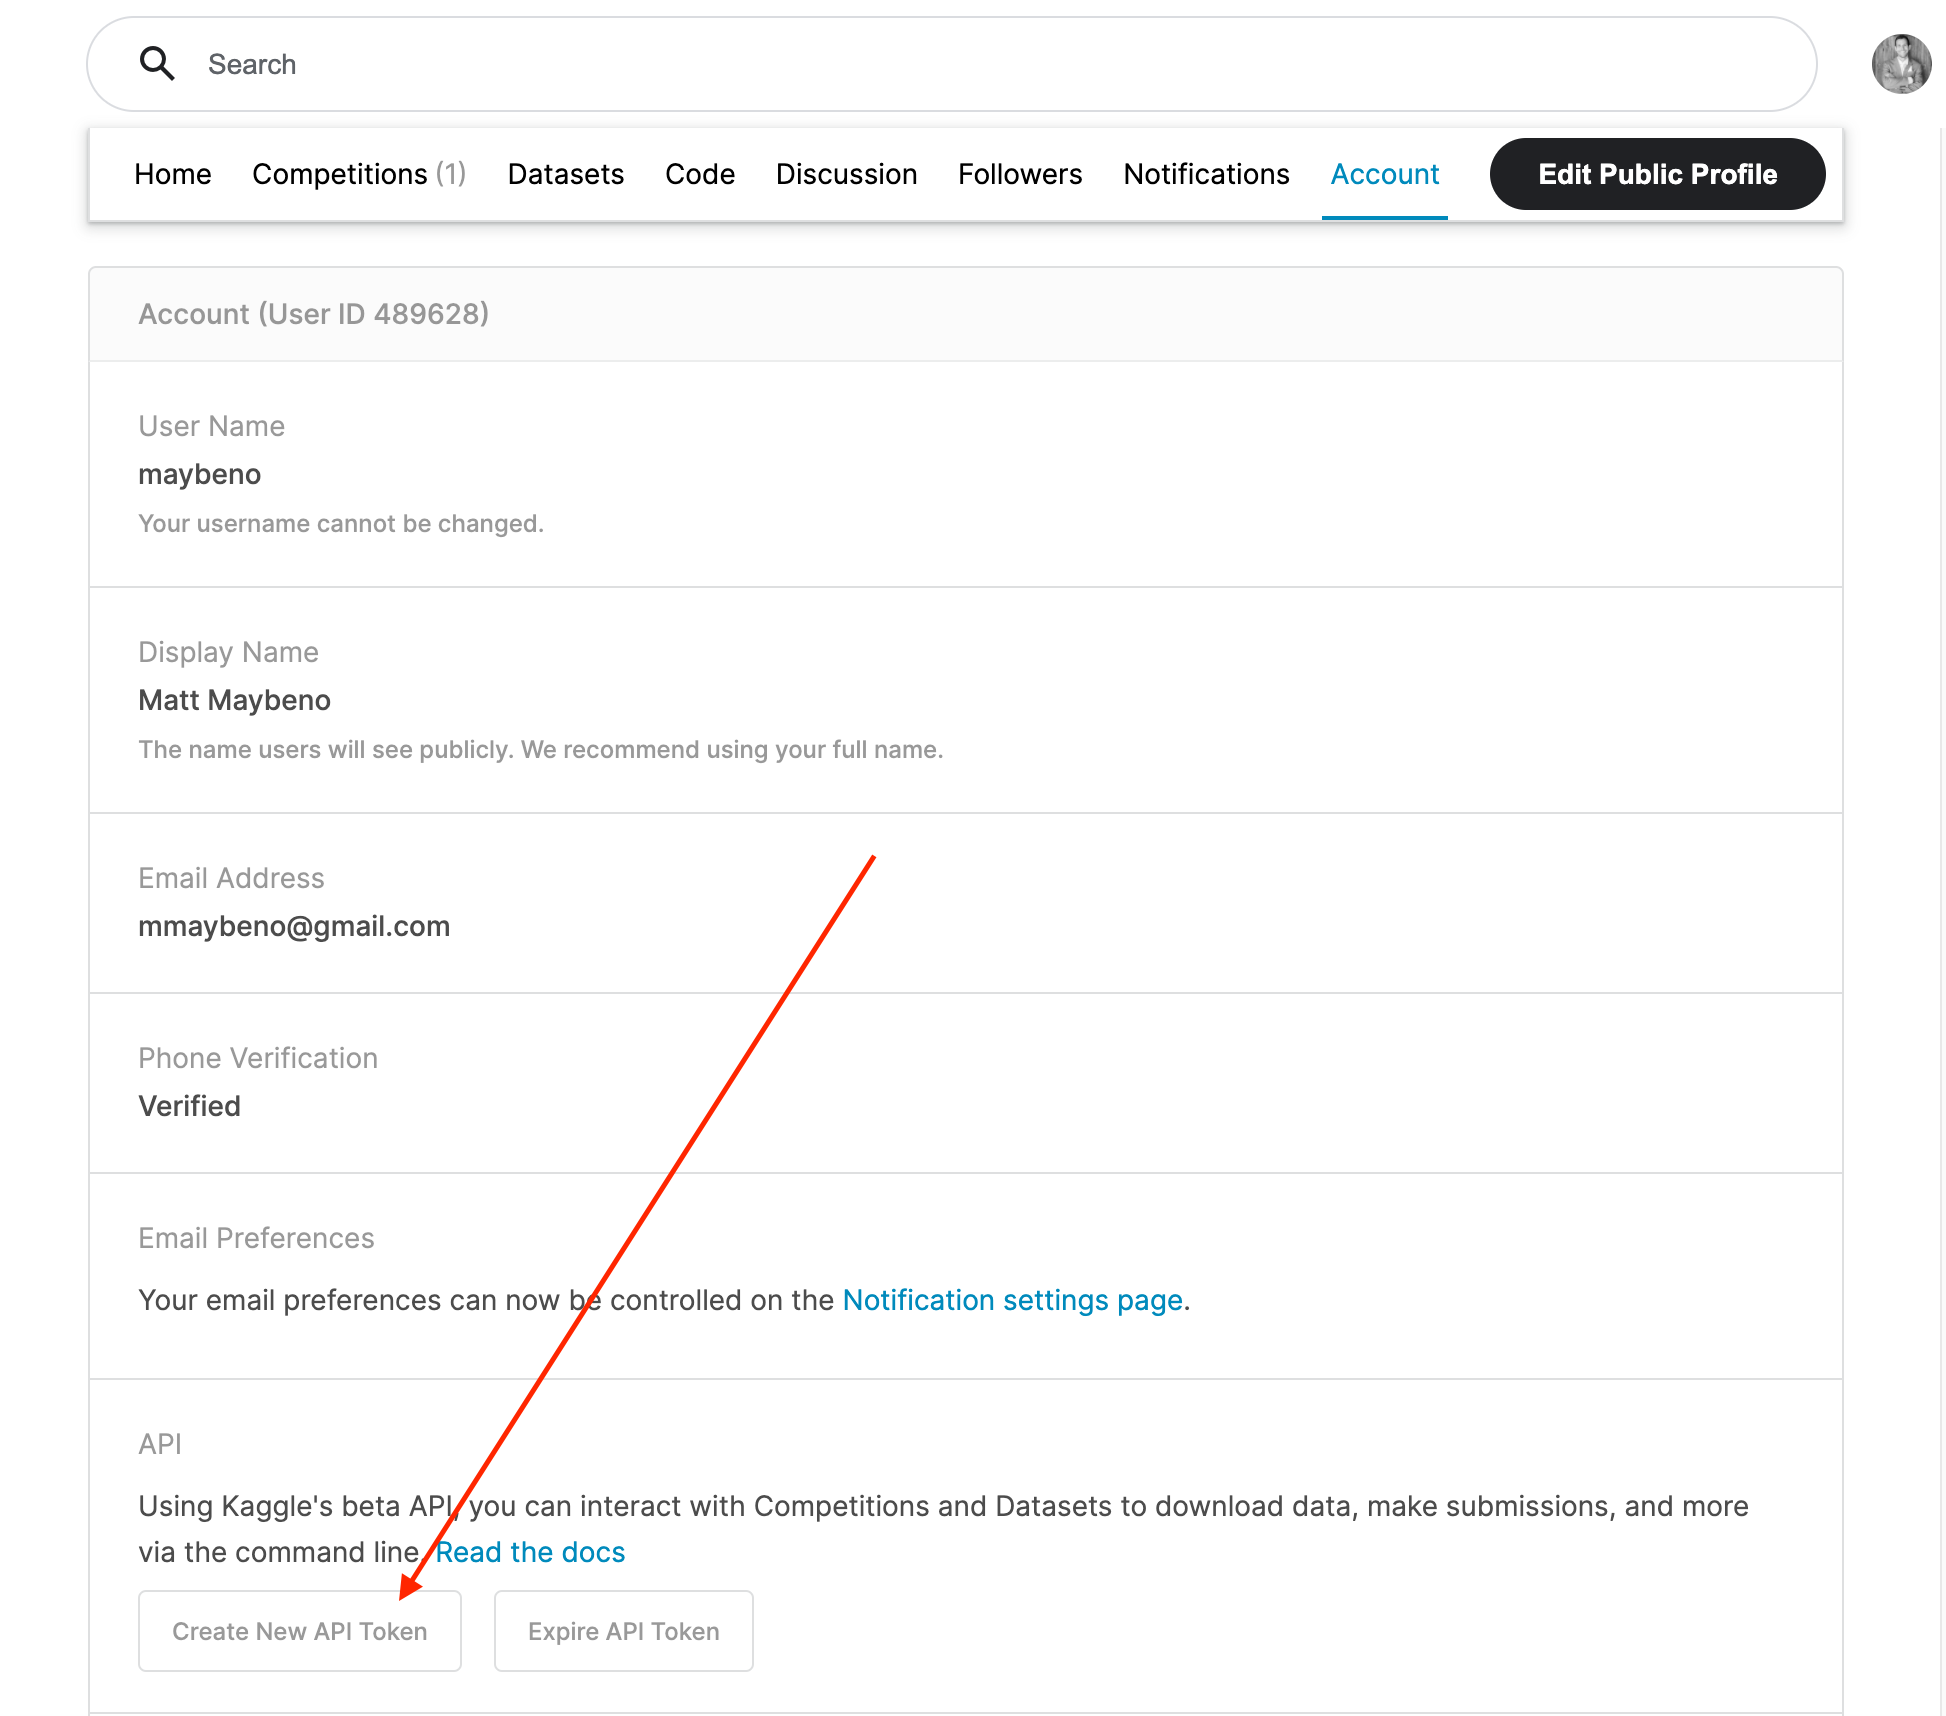
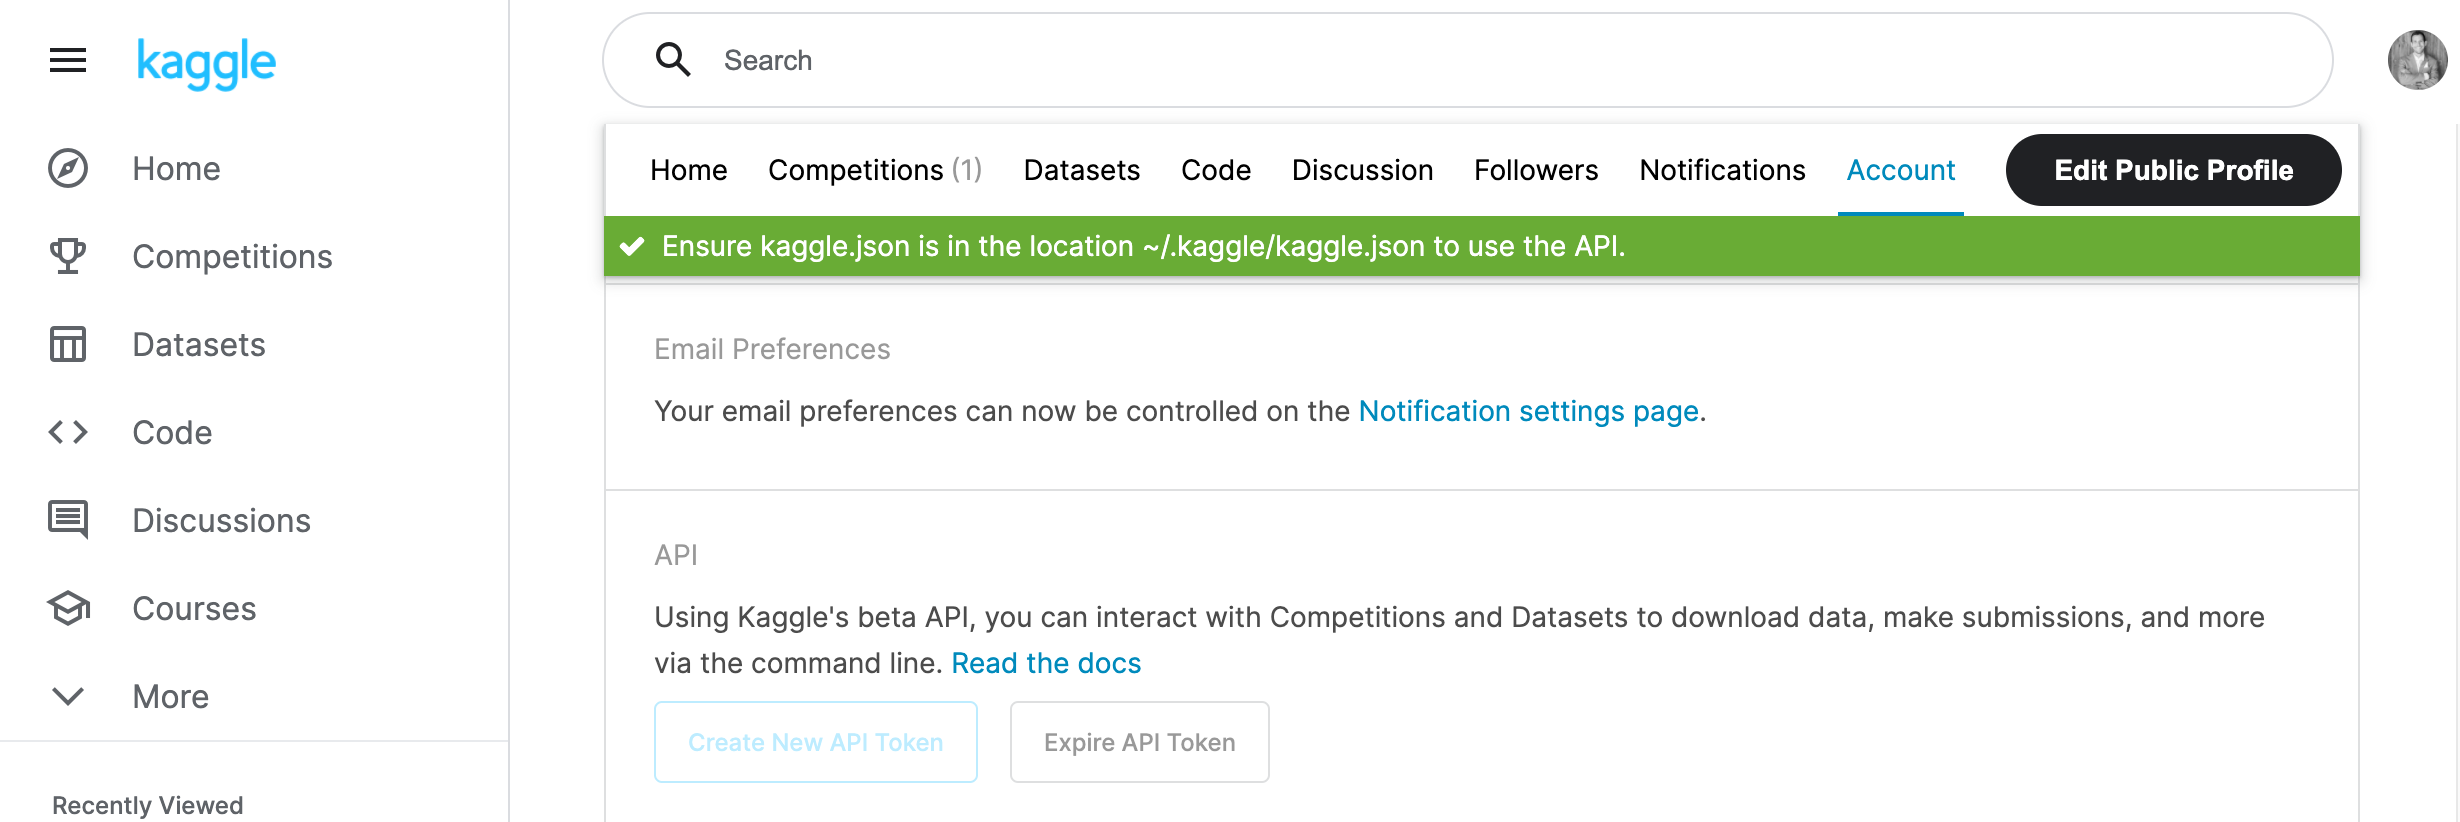
3. Open up `kaggle.json` and use the username and key.
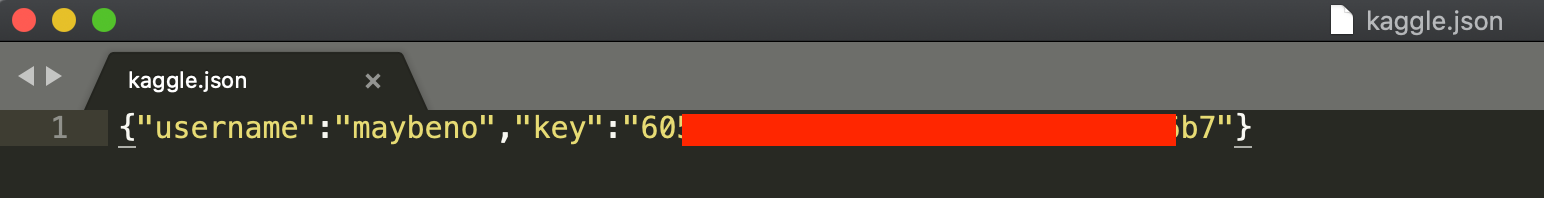

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "FILL_IN_USERNAME"
kaggle_key = "FILL_IN_KEY"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
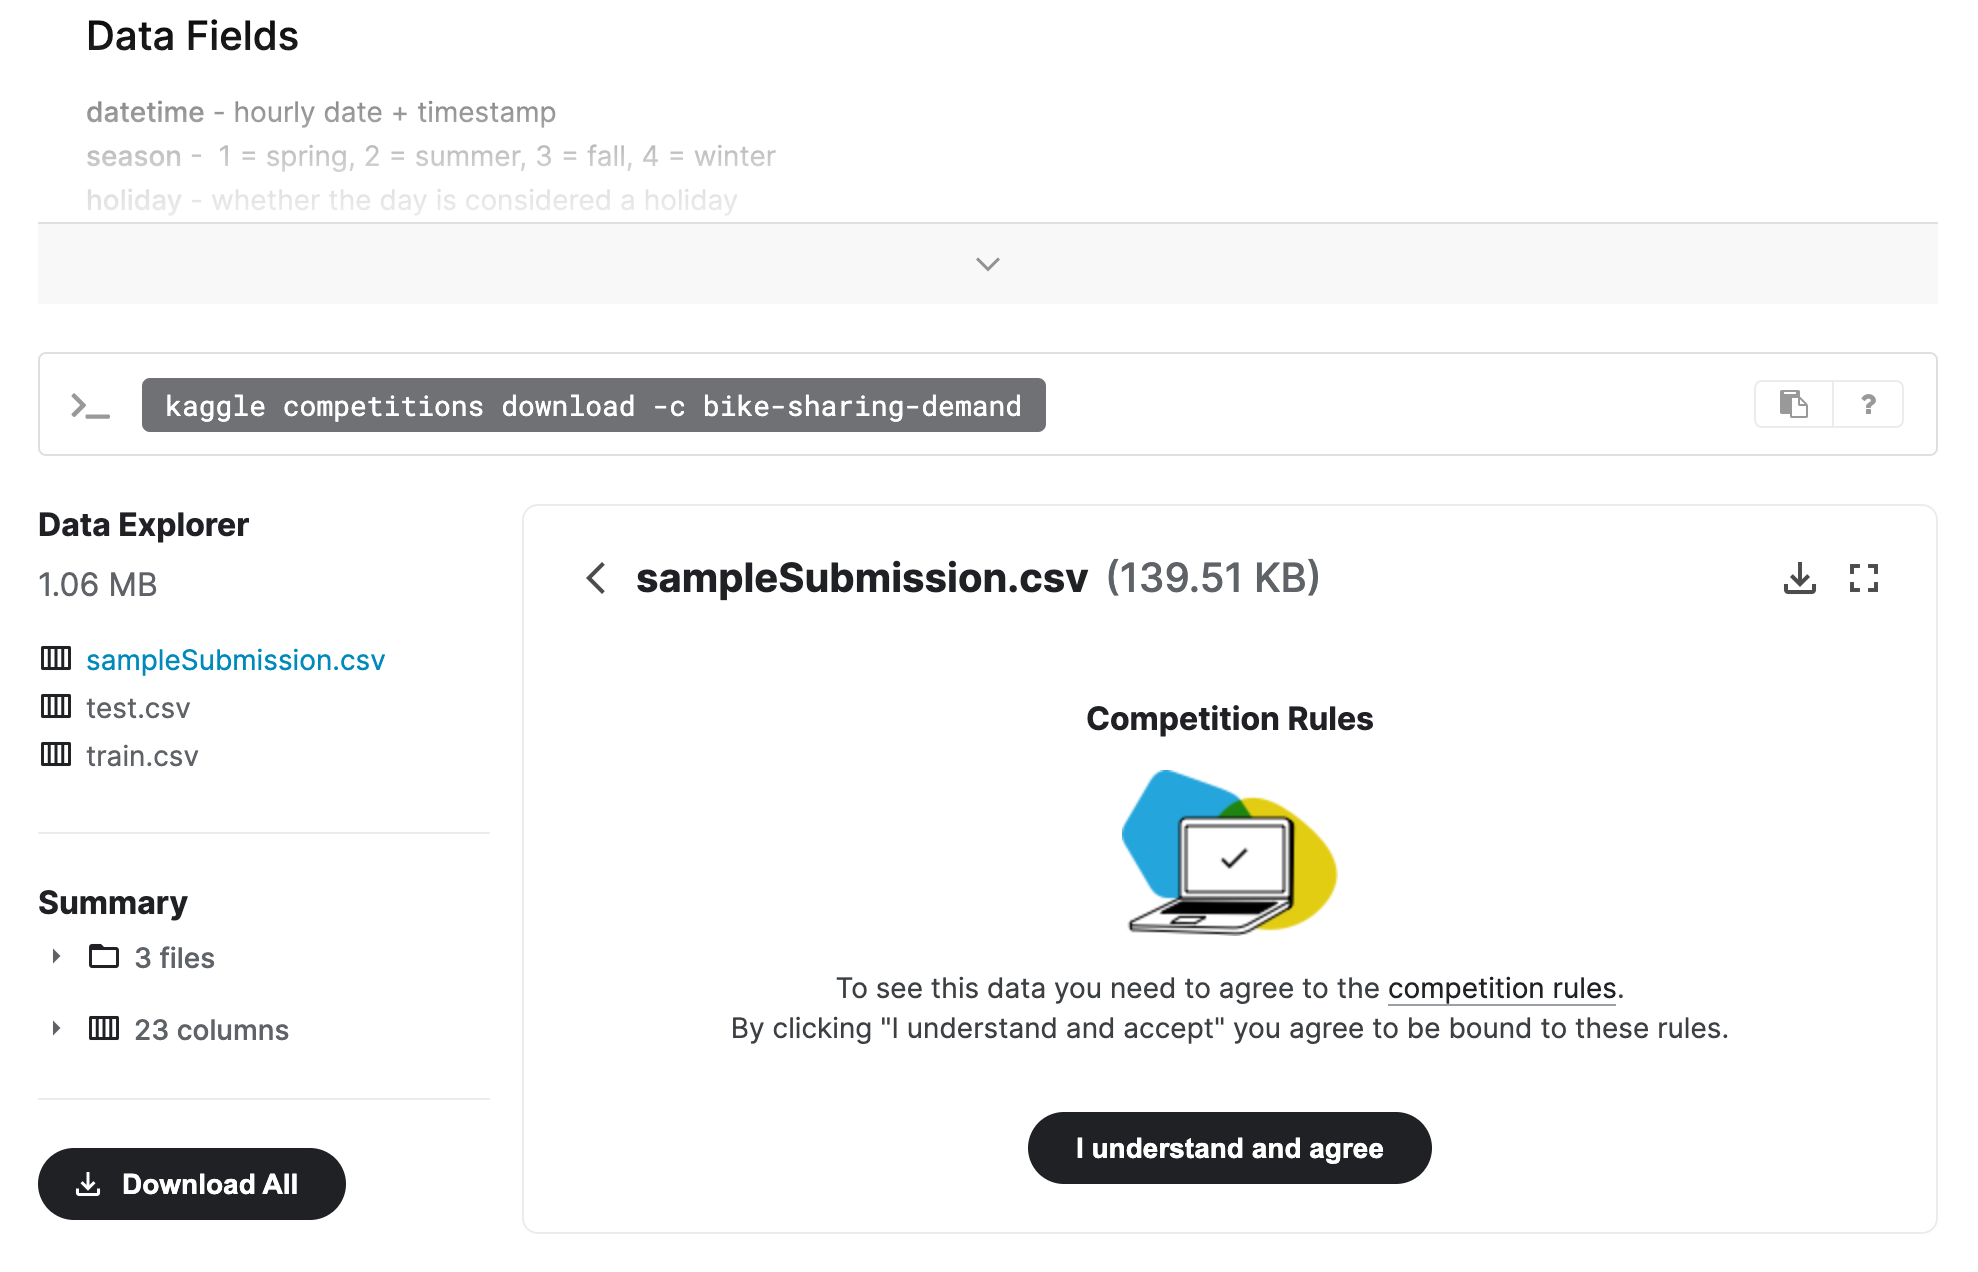

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [4]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [8]:
predictor = TabularPredictor(
    label = 'count',
    eval_metric = 'root_mean_squared_error',
    verbosity = 2,
    problem_type='regression',
).fit(
    train_data = train.drop(columns=['casual', 'registered']),
    time_limit = 600,
    presets = 'best_quality',
)

No path specified. Models will be saved in: "AutogluonModels\ag-20250509_154611"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          8
Memory Avail:       1.99 GB / 15.79 GB (12.6%)
Disk Space Avail:   82.72 GB / 200.00 GB (41.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout 

(_ray_fit pid=30732) [1000]	valid_set's rmse: 130.657
(_ray_fit pid=29972) [2000]	valid_set's rmse: 134.443 [repeated 9x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=28544) [3000]	valid_set's rmse: 135.865 [repeated 7x across cluster]
(_ray_fit pid=29956) [6000]	valid_set's rmse: 125.468 [repeated 7x across cluster]
(_ray_fit pid=29972) [7000]	valid_set's rmse: 132.416 [repeated 7x across cluster]
(_ray_fit pid=29972) [9000]	valid_set's rmse: 132.422 [repeated 6x across cluster]


(_dystack pid=4592) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=4592) 	40.97s	 = Training   runtime
(_dystack pid=4592) 	16.6s	 = Validation runtime
(_dystack pid=4592) Fitting model: LightGBM_BAG_L1 ... Training model for up to 19.71s of the 63.71s of remaining time.
(_dystack pid=4592) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.39%)


(_ray_fit pid=29940) [1000]	valid_set's rmse: 124.896
(_ray_fit pid=7964) [1000]	valid_set's rmse: 129.285


(_dystack pid=4592) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=4592) 	10.64s	 = Training   runtime
(_dystack pid=4592) 	0.79s	 = Validation runtime
(_dystack pid=4592) Fitting model: WeightedEnsemble_L2 ... Training model for up to 131.96s of the 42.60s of remaining time.
(_dystack pid=4592) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=4592) 	-89.9155	 = Validation score   (-root_mean_squared_error)
(_dystack pid=4592) 	0.02s	 = Training   runtime
(_dystack pid=4592) 	0.0s	 = Validation runtime
(_dystack pid=4592) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=4592) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 42.55s of the 42.51s of remaining time.
(_dystack pid=4592) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.48%)


(_ray_fit pid=30332) [1000]	valid_set's rmse: 77.6826 [repeated 6x across cluster]
(_ray_fit pid=29340) [2000]	valid_set's rmse: 74.8019 [repeated 8x across cluster]


(_dystack pid=4592) 	-74.0587	 = Validation score   (-root_mean_squared_error)
(_dystack pid=4592) 	13.87s	 = Training   runtime
(_dystack pid=4592) 	1.33s	 = Validation runtime
(_dystack pid=4592) Fitting model: LightGBM_BAG_L2 ... Training model for up to 18.31s of the 18.27s of remaining time.
(_dystack pid=4592) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.40%)
(_dystack pid=4592) 	-67.8061	 = Validation score   (-root_mean_squared_error)
(_dystack pid=4592) 	8.28s	 = Training   runtime
(_dystack pid=4592) 	0.11s	 = Validation runtime
(_dystack pid=4592) Fitting model: WeightedEnsemble_L3 ... Training model for up to 131.96s of the 0.04s of remaining time.
(_dystack pid=4592) 	Ensemble Weights: {'LightGBM_BAG_L2': 1.0}
(_dystack pid=4592) 	-67.8061	 = Validation score   (-root_mean_squared_error)
(_dystack pid=4592) 	0.05s	 = Training   runtime
(_dystack pid=4592) 	0.0s	 = Validation runtime
(_dystac

### Review AutoGluon's training run with ranking of models that did the best.

In [18]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -50.511910  root_mean_squared_error      23.819156  272.940442                0.003000           0.070011            3       True         17
1   NeuralNetFastAI_BAG_L2  -51.453248  root_mean_squared_error      22.267705  260.706940                0.369653          30.239979            2       True         16
2   RandomForestMSE_BAG_L2  -53.549603  root_mean_squared_error      22.684292  239.570107                0.786240           9.103147            2       True         13
3     ExtraTreesMSE_BAG_L2  -53.829952  root_mean_squared_error      22.660264  233.527305                0.762212           3.060344            2       True         15
4          LightGBM_BAG_L2  -54.697331  root_mean_squared_error      22.093643  238.177180   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.588176259

In [31]:
# Sort the leaderboard by the score value
predictor_leaderboard = predictor.leaderboard(silent = True)
predictor_leaderboard = predictor_leaderboard.sort_values(by='score_val', ascending=False)
predictor_leaderboard.head(10)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-50.511910,root_mean_squared_error,23.819156,272.940442,0.003000,0.070011,3,True,17
1,NeuralNetFastAI_BAG_L2,-51.453248,root_mean_squared_error,22.267705,260.706940,0.369653,30.239979,2,True,16
2,RandomForestMSE_BAG_L2,-53.549603,root_mean_squared_error,22.684292,239.570107,0.786240,9.103147,2,True,13
3,ExtraTreesMSE_BAG_L2,-53.829952,root_mean_squared_error,22.660264,233.527305,0.762212,3.060344,2,True,15
4,LightGBM_BAG_L2,-54.697331,root_mean_squared_error,22.093643,238.177180,0.195591,7.710219,2,True,12
5,CatBoost_BAG_L2,-55.874827,root_mean_squared_error,22.458775,262.692145,0.560723,32.225184,2,True,14
6,LightGBMXT_BAG_L2,-60.205950,root_mean_squared_error,26.772801,249.547494,4.874749,19.080533,2,True,11
8,WeightedEnsemble_L2,-84.146423,root_mean_squared_error,0.031564,0.066101,0.000999,0.034007,2,True,10
7,KNeighborsDist_BAG_L1,-84.146423,root_mean_squared_error,0.030564,0.032094,0.030564,0.032094,1,True,2
9,KNeighborsUnif_BAG_L1,-101.588176,root_mean_squared_error,0.034558,0.032009,0.034558,0.032009,1,True,1


### Create predictions from test dataset

In [32]:
predictions = predictor.predict(test)
predictions.head()

0    25.913456
1    42.000267
2    46.638481
3    49.345932
4    51.383026
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [33]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      101.578255
std        88.327919
min         1.227817
25%        24.226603
50%        70.038437
75%       167.565201
max       351.879761
Name: count, dtype: float64

In [34]:
# How many negative values do we have?
predictions[predictions < 0].count()

0

In [35]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [36]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [37]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "0905_default"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|▍         | 8.00k/195k [00:00<00:07, 26.0kB/s]
 45%|████▌     | 88.0k/195k [00:00<00:00, 244kB/s] 
100%|██████████| 195k/195k [00:02<00:00, 97.2kB/s]


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [15]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

'tail' is not recognized as an internal or external command,
operable program or batch file.


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

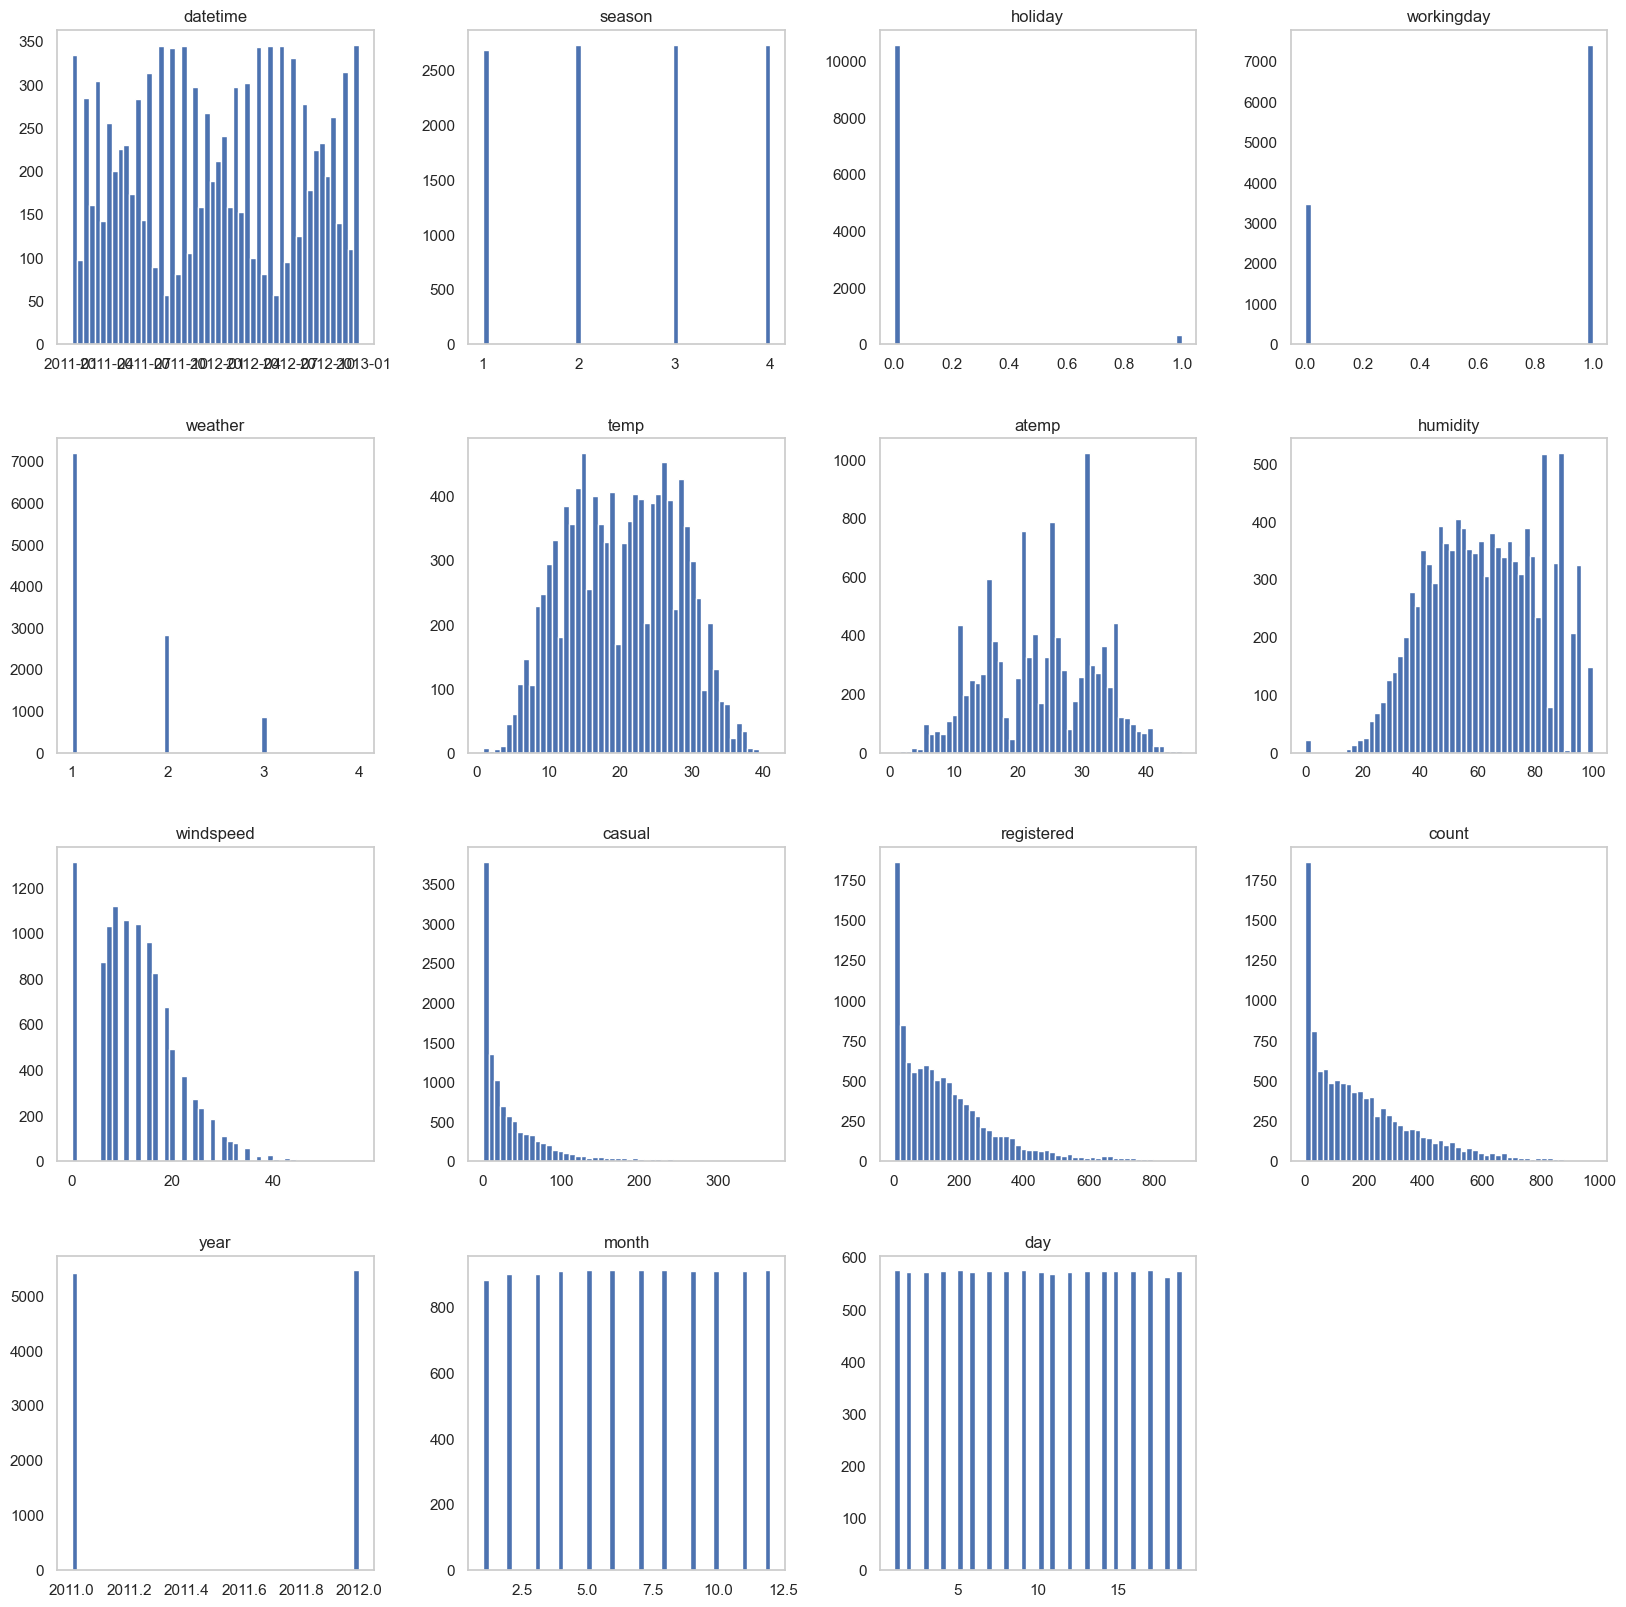

In [39]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploratory data analysis
train.hist(figsize=(20, 20), bins=50, grid=False)
plt.show()

In [40]:
# create a new feature
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day

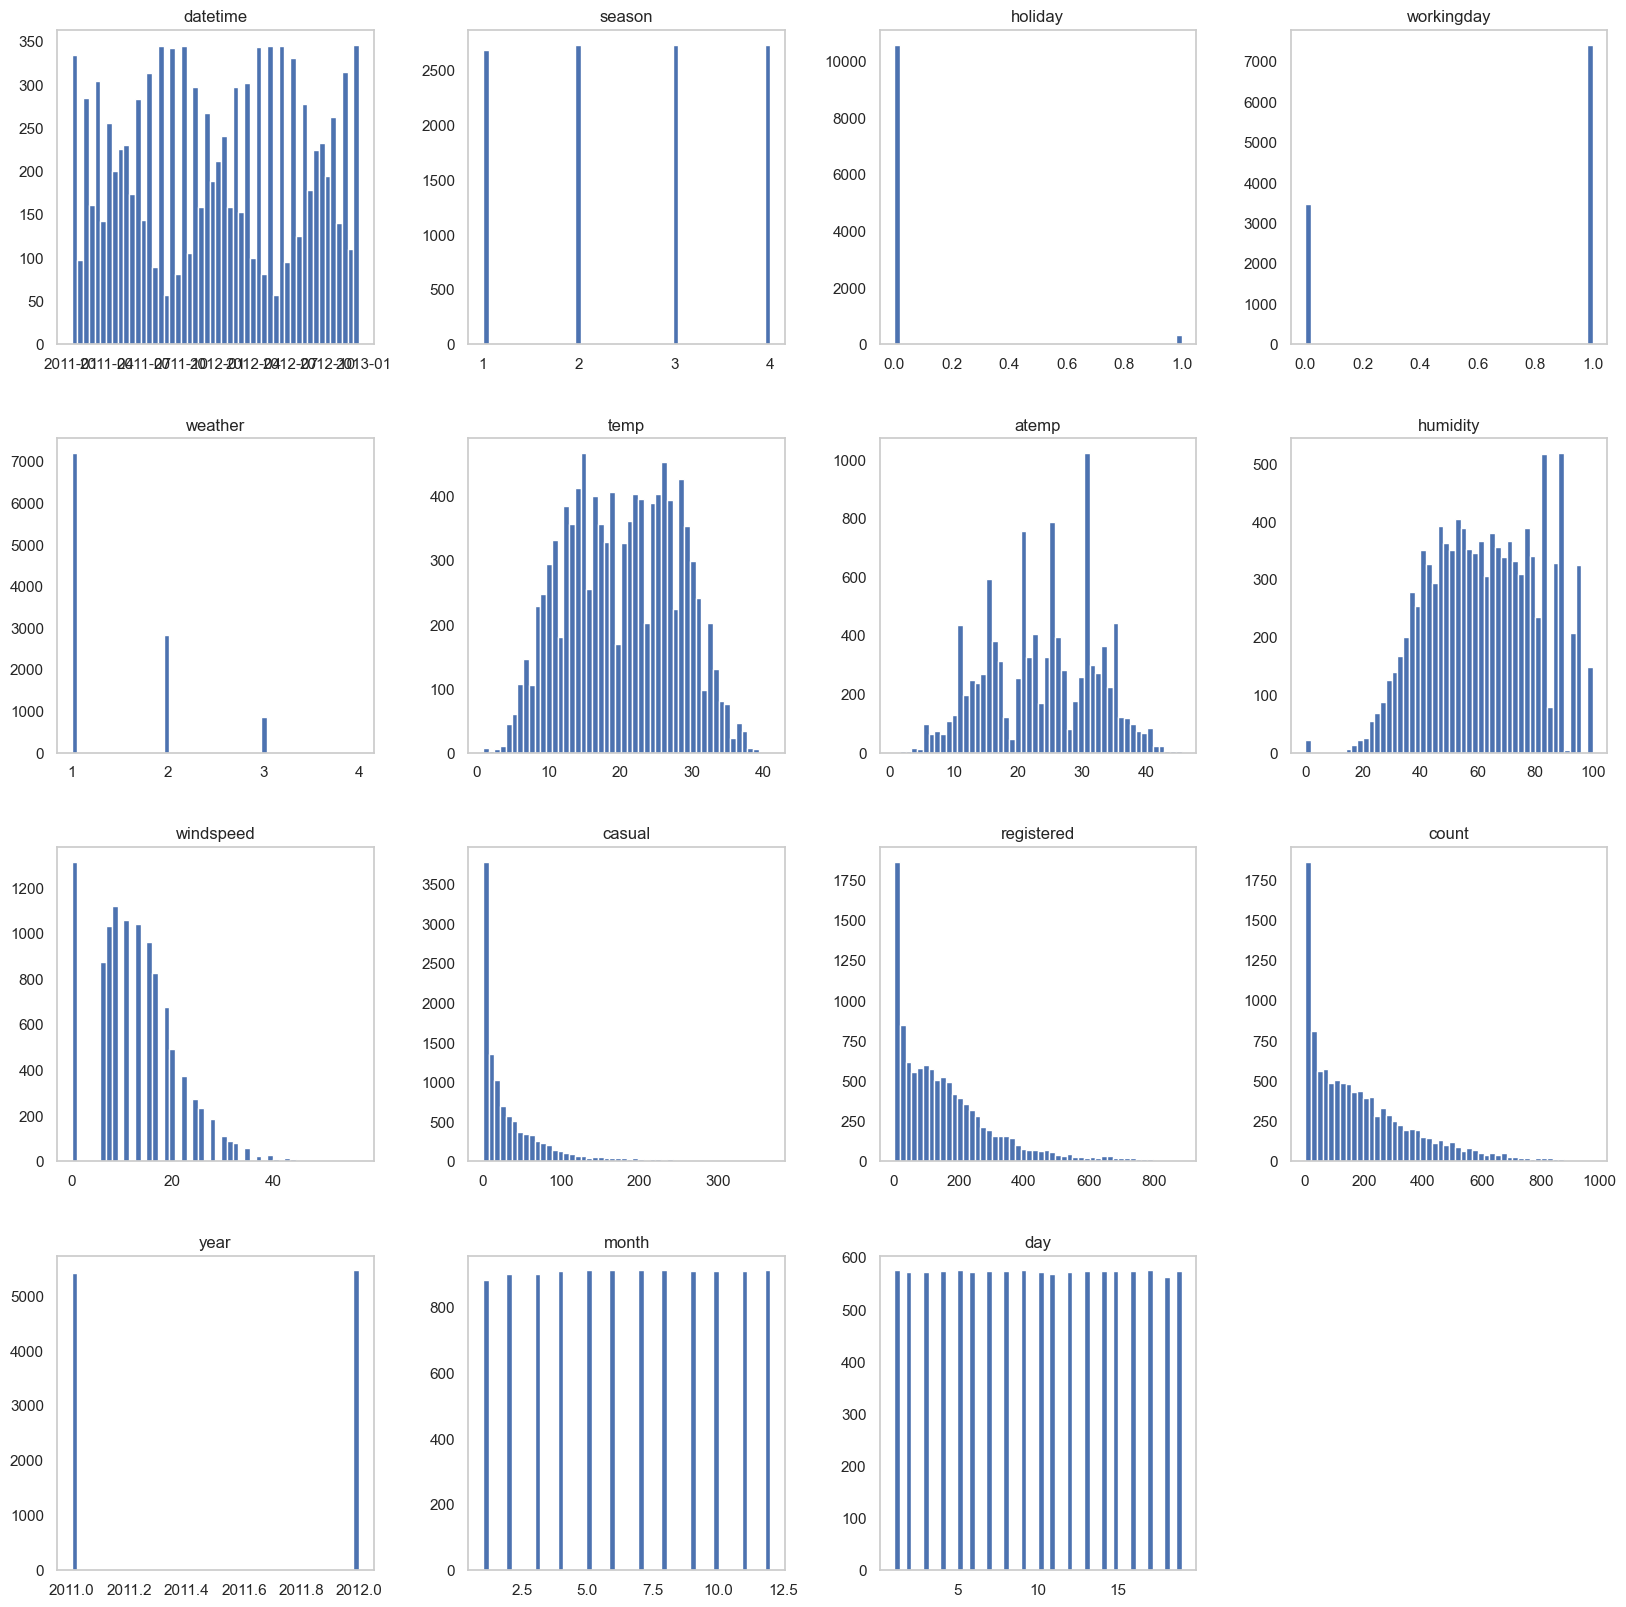

In [41]:
train.hist(figsize=(20, 20), bins=50, grid=False)
plt.show()

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [42]:
train["season"] = train.season.astype("category")
train["weather"] = train.weather.astype("category")
test["season"] = test.season.astype("category")
test["weather"] = test.weather.astype("category")

In [43]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1


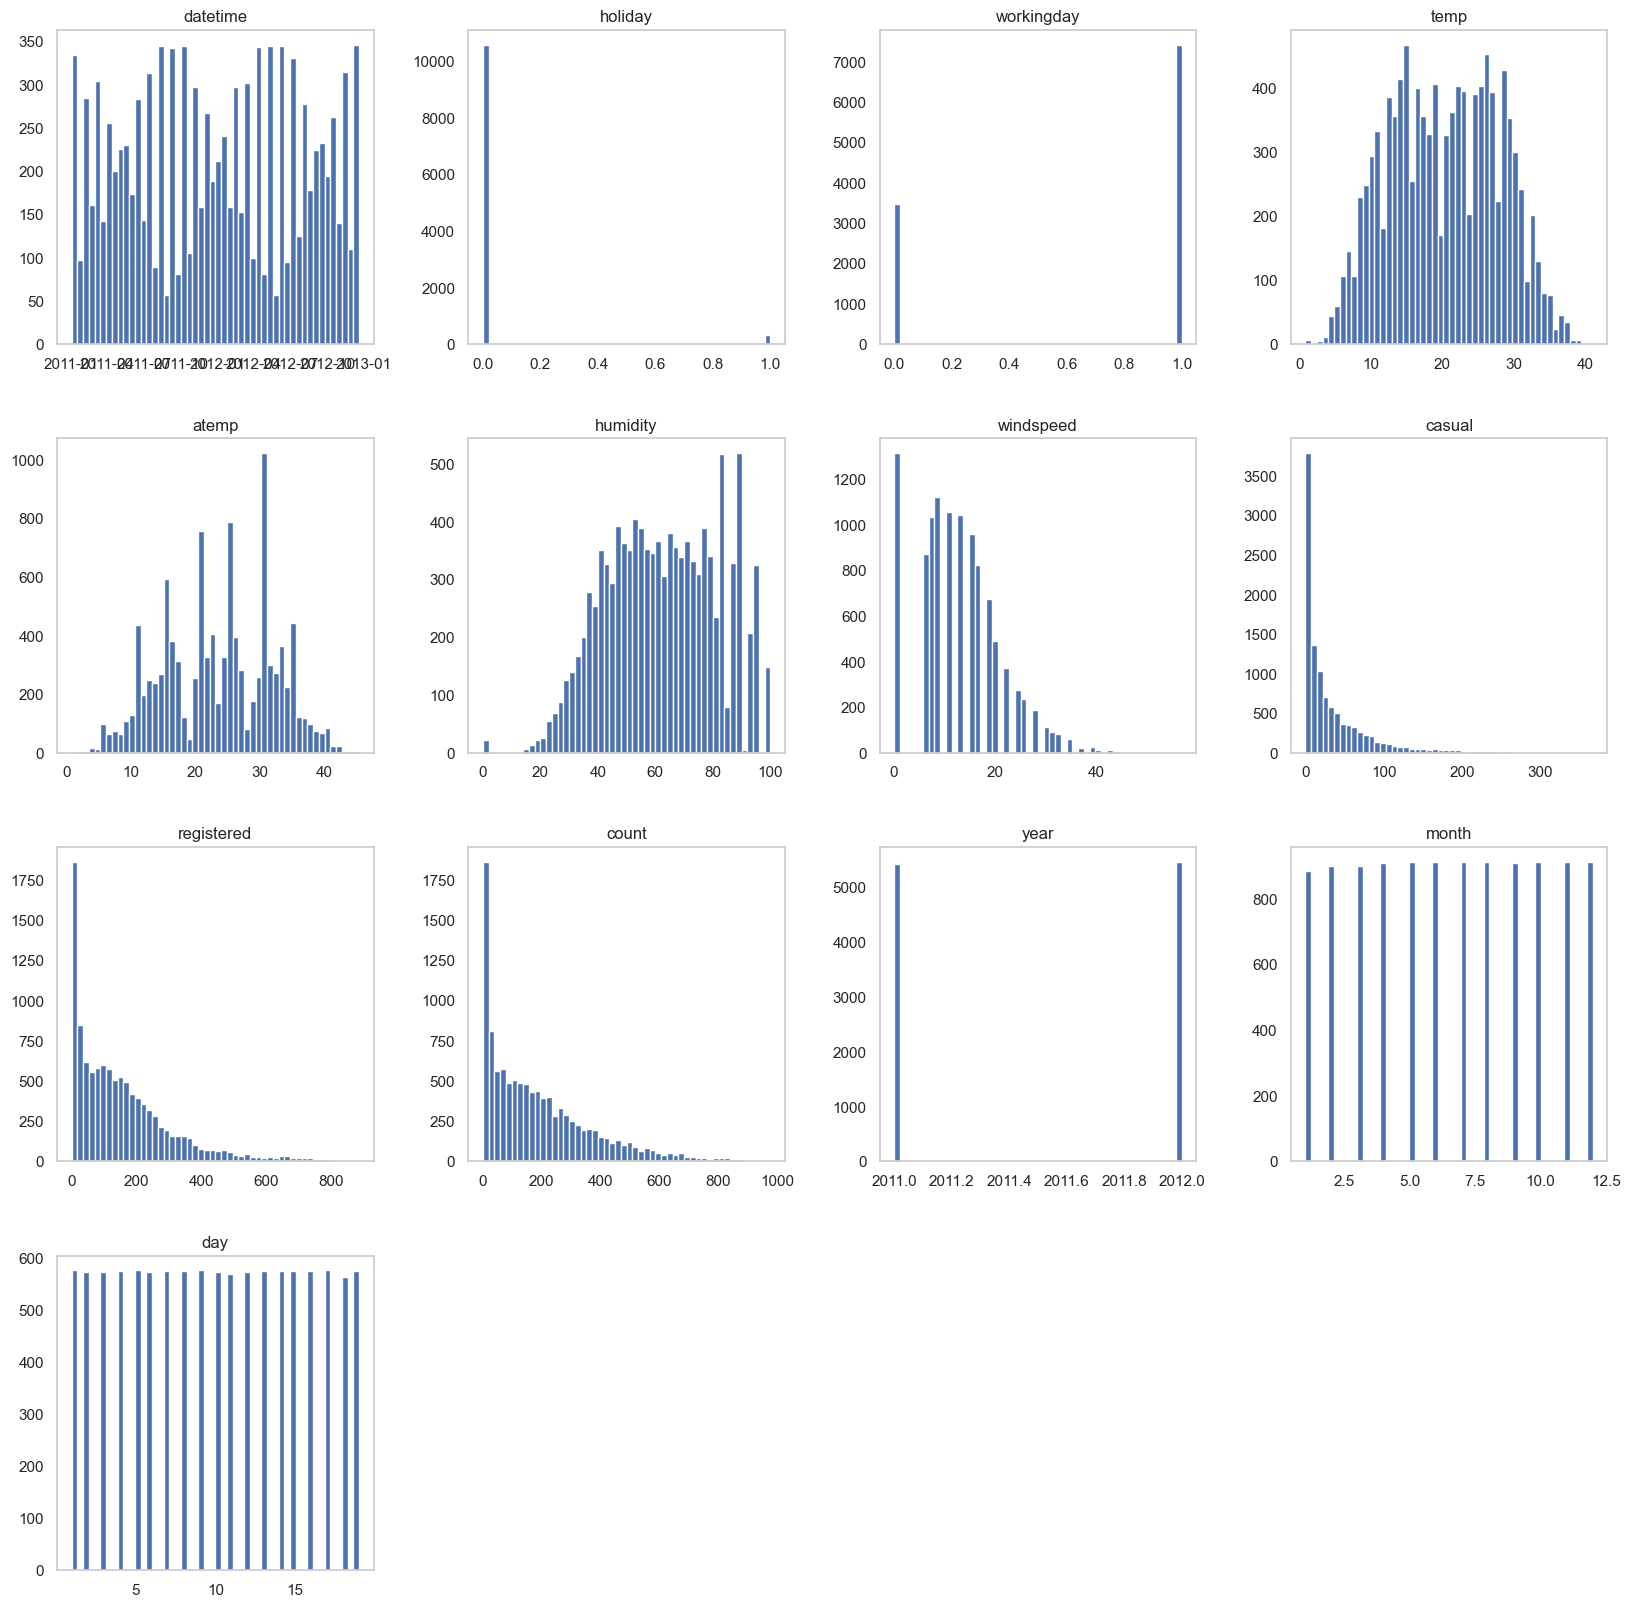

In [44]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20, 20), bins=50, grid=False)
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [53]:
hyperparameters = {'GBM': {'num_boost_round': 100, 'learning_rate': 0.1},
    'NN_TORCH': {'num_epochs': 20, 'learning_rate': 0.01},
    'CAT': {'iterations': 500, 'depth': 8, 'learning_rate': 0.1},
    'XGB': {'n_estimators': 100, 'learning_rate': 0.1},
    'RF': {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1},
    'KNN': {'n_neighbors': 5, 'weights': 'uniform', 'learning_rate': 0.1},
}

hyperparameters_tune_kwargs = {
    'num_trials': 8,
    'scheduler': 'local',
    'searcher': 'auto',
}

In [54]:
predictor_new_features = TabularPredictor(
    label = 'count',
    eval_metric = 'root_mean_squared_error',
).fit(train_data= train.drop(columns=['datetime','casual', 'registered']),
    time_limit = 720,
    presets = 'good_quality',
    num_gpus = 1,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameters_tune_kwargs,
)

2025-05-09 23:31:08,316	INFO timeout.py:54 -- Reached timeout of 67.43588458299637 seconds. Stopping all trials.
2025-05-09 23:31:08,337	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to 'A:/Programming/AWS/Bike-Sharing-Demand/project/AutogluonModels/ag-20250509_175218/models/NeuralNetTorch_BAG_L1' in 0.0175s.
2025-05-09 23:31:18,448	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 2 trial(s):
- 939a317e: FileNotFoundError('Could not fetch metrics for 939a317e: both result.json and progress.csv were not found at A:/Programming/AWS/Bike-Sharing-Demand/project/AutogluonModels/ag-20250509_175218/models/NeuralNetTorch_BAG_L1/939a317e')
- f2702a8a: FileNotFoundError('Could not fetch metrics for f2702a8a: both result.json and progress.csv were not found at A:/Programming/AWS/Bike-Sharing-Demand/project/AutogluonModels/ag-20250509_175218/models/NeuralNetTorch_BAG_L1/f2702a8a')
No model was trained during hyperparameter tuning NeuralNetT

In [55]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L2 -131.792003  root_mean_squared_error       0.399668  107.518282                0.000000           0.026001            2      False          8
1          XGBoost_BAG_L1\T2 -132.285156  root_mean_squared_error       0.190056   20.225490                0.190056          20.225490            1      False          6
2         LightGBM_BAG_L1\T2 -133.454252  root_mean_squared_error       0.166592   17.564309                0.166592          17.564309            1      False          2
3         LightGBM_BAG_L1\T1 -134.584740  root_mean_squared_error       0.130594   24.675479                0.130594          24.675479            1      False          1
4          XGBoost_BAG_L1\T3 -134.754809  root_mean_squared_error       0.072029   

{'model_types': {'LightGBM_BAG_L1\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T3': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1\\T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1\\T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1\\T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1\\T3': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L1\\T1_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T2_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T3_FULL': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1\\T1_FULL': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1\\T1_FULL': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1\\T2_FULL': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1\\T3_FULL': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2_FULL': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1\\T1': -134.58473952388212,
  'Ligh

In [56]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test.drop(columns=['datetime']))
predictions_new_features[predictions_new_features < 0] = 0

In [57]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [58]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "0905_2"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|▍         | 8.00k/195k [00:00<00:05, 36.5kB/s]
 53%|█████▎    | 104k/195k [00:00<00:00, 393kB/s]  
100%|██████████| 195k/195k [00:01<00:00, 102kB/s]


In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [59]:
hyperparameters_2 = {'GBM': {'num_boost_round': 100, 'learning_rate': 0.1},
                     'NN_TORCH': {'num_epochs': 20, 'learning_rate': 0.01},
                     'CAT': {'iterations': 500, 'depth': 8, 'learning_rate': 0.1},
                     'XGB': {'n_estimators': 100, 'learning_rate': 0.1},
                     'RF': {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1},
                     'KNN': {'n_neighbors': 5, 'weights': 'uniform', 'learning_rate': 0.1},
}

hyperparameters_tune_kwargs_2 = {
    'num_trials': 10,
    'scheduler': 'local',
    'searcher': 'auto',
    }

In [83]:
predictor_new_hpo = TabularPredictor(
    problem_type= 'regression',
    label = 'count',
    verbosity= 2,
).fit(train_data= train.drop(columns=['datetime','casual', 'registered']),
   time_limit = 600,
   presets = 'experimental_quality',
   num_gpus = 2,
   hyperparameters=hyperparameters_2,
   hyperparameter_tune_kwargs=hyperparameters_tune_kwargs_2,
      )

2025-05-10 00:30:07,201	INFO timeout.py:54 -- Reached timeout of 36.763147602081304 seconds. Stopping all trials.
2025-05-10 00:30:07,234	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to 'A:/Programming/AWS/Bike-Sharing-Demand/project/AutogluonModels/ag-20250509_185048/models/NeuralNetTorch_BAG_L2' in 0.0226s.
2025-05-10 00:30:13,690	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 3 trial(s):
- c891cd6d: FileNotFoundError('Could not fetch metrics for c891cd6d: both result.json and progress.csv were not found at A:/Programming/AWS/Bike-Sharing-Demand/project/AutogluonModels/ag-20250509_185048/models/NeuralNetTorch_BAG_L2/c891cd6d')
- 4cdc517e: FileNotFoundError('Could not fetch metrics for 4cdc517e: both result.json and progress.csv were not found at A:/Programming/AWS/Bike-Sharing-Demand/project/AutogluonModels/ag-20250509_185048/models/NeuralNetTorch_BAG_L2/4cdc517e')
- 7580f383: FileNotFoundError('Could not fetch metrics for 

In [84]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -134.029602  root_mean_squared_error       0.415765  204.599306                0.000997           0.041056            3       True          8
1  WeightedEnsemble_L2 -134.283238  root_mean_squared_error       0.197654   60.322675                0.001005           0.017003            2       True          4
2   CatBoost_BAG_L2\T1 -134.378050  root_mean_squared_error       0.305237  166.557865                0.072067          57.446701            2       True          6
3   LightGBM_BAG_L1\T1 -134.600109  root_mean_squared_error       0.110115   25.494746                0.110115          25.494746            1       True          1
4    XGBoost_BAG_L2\T1 -134.862975  root_mean_squared_error       0.342701  147.111548                0.109531   

{'model_types': {'LightGBM_BAG_L1\\T1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1\\T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1\\T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2\\T1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2\\T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L2\\T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1\\T1': -134.60010903534237,
  'CatBoost_BAG_L1\\T1': -138.8376773357544,
  'XGBoost_BAG_L1\\T1': -134.97725010258526,
  'WeightedEnsemble_L2': -134.2832377363548,
  'LightGBM_BAG_L2\\T1': -135.00464580566674,
  'CatBoost_BAG_L2\\T1': -134.37805013959132,
  'XGBoost_BAG_L2\\T1': -134.86297537950776,
  'WeightedEnsemble_L3': -134.02960213279636},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1\\T1': ['LightGBM_BAG_L1', 'T1'],
  'CatBoost_BAG_L1\\T1': ['CatBoost_BAG_L1', 'T1'],
  'XGBo

In [62]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test.drop(columns=['datetime']))
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [63]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("sampleSubmission.csv")
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [64]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "0905_3"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|▍         | 8.00k/195k [00:00<00:05, 36.5kB/s]
 49%|████▉     | 96.0k/195k [00:00<00:00, 371kB/s] 
100%|██████████| 195k/195k [00:02<00:00, 98.4kB/s]


In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `?`

# Round 4 of Tuning

## Adding weekend feature

In [65]:
# Adding a new feature to indicate whether the day is a weekend
train["is_weekend"] = train["datetime"].dt.weekday >= 5
test["is_weekend"] = test["datetime"].dt.weekday >= 5

# Convert the new feature to a categorical type
train["is_weekend"] = train["is_weekend"].astype("category")
test["is_weekend"] = test["is_weekend"].astype("category")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,is_weekend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,True
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,True
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,True
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,True
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,True


### Correlation matrix to see how the features relate to each other

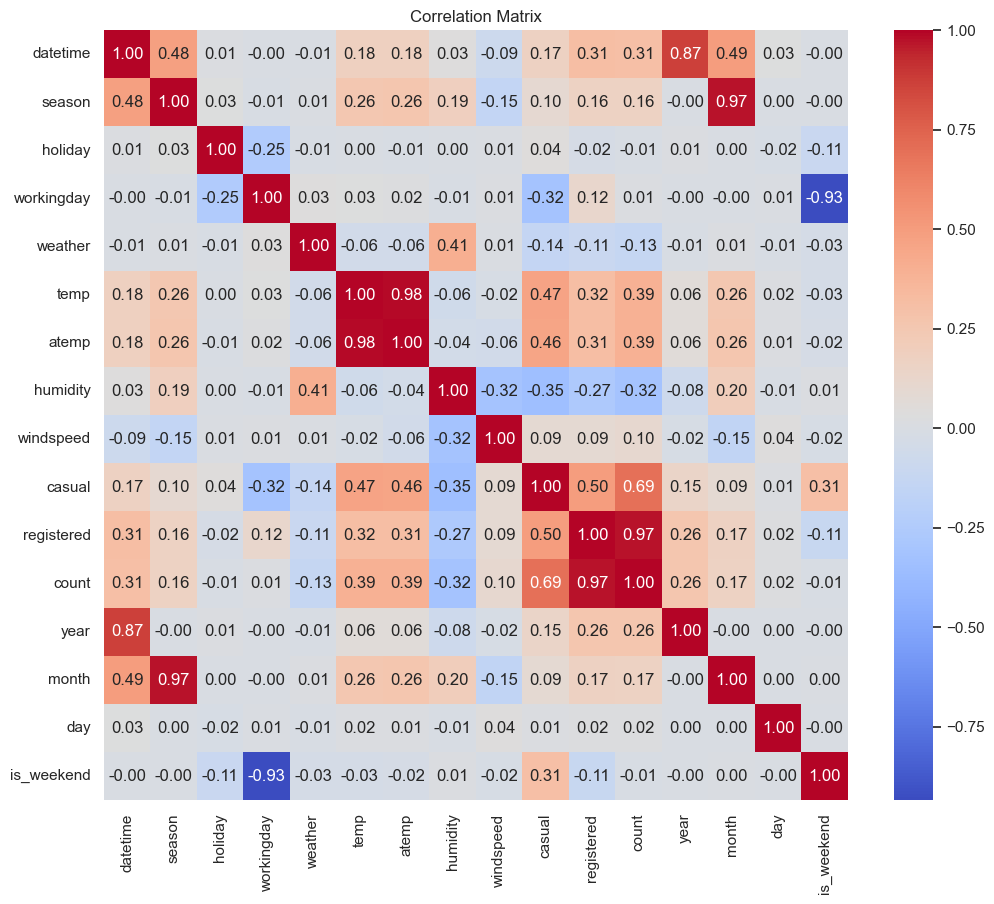

<Figure size 640x480 with 0 Axes>

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a correlation matrix
corr = train.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Draw the heatmap with the mask and correct aspect ratio
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()
# Save the correlation matrix as png
plt.savefig("correlation_matrix.png")

## Time Series Analysis

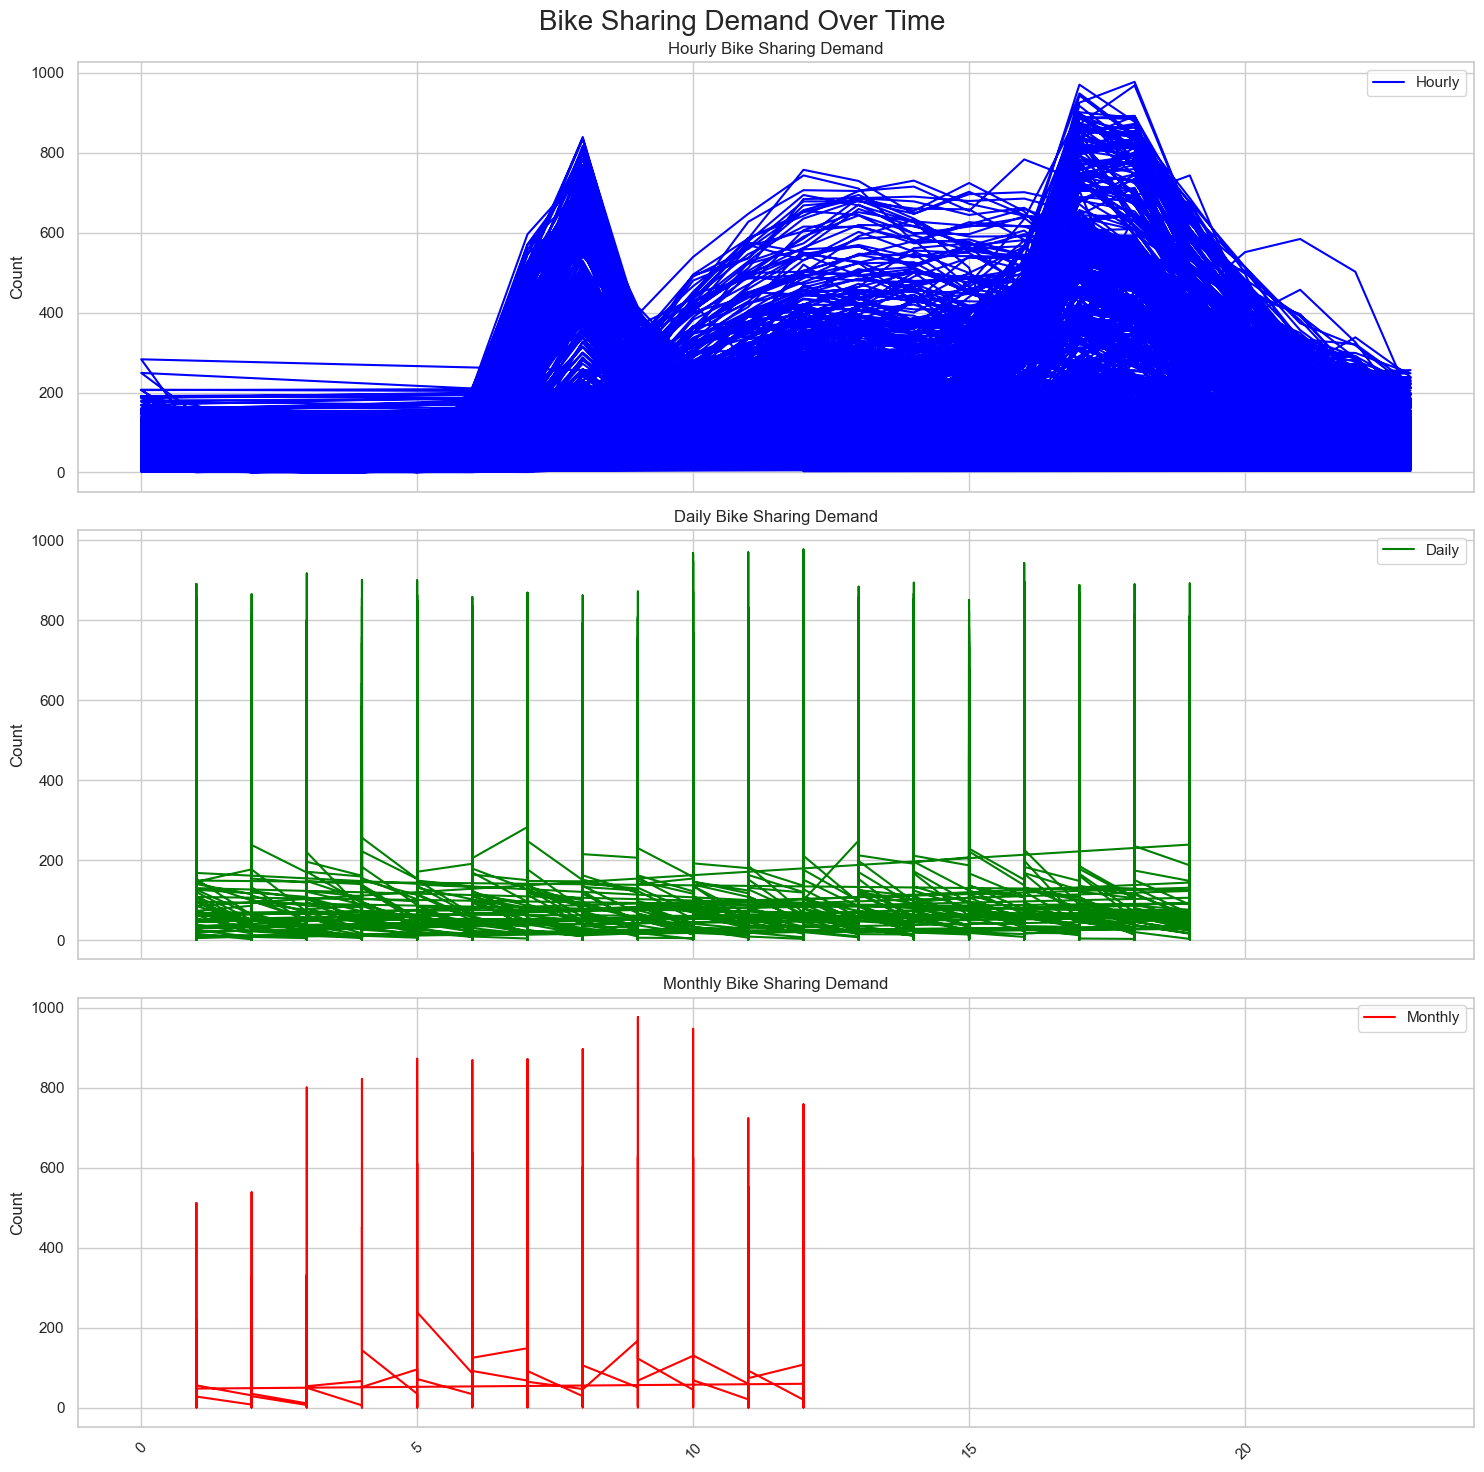

In [67]:
train_analysis = train.copy()
train_analysis["hour"] = train_analysis["datetime"].dt.hour
train_analysis["day"] = train_analysis["datetime"].dt.day
train_analysis["month"] = train_analysis["datetime"].dt.month

# Time series analysis of bike sharing demand. Compare with hourly, daily, and monthly with proper visualization
# Use Grid
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)
fig.suptitle("Bike Sharing Demand Over Time", fontsize=20)

# Hourly
axs[0].plot(train_analysis["hour"], train_analysis["count"], color="blue", label="Hourly")
axs[0].set_ylabel("Count")
axs[0].legend()
axs[0].set_title("Hourly Bike Sharing Demand")

# Daily
axs[1].plot(train_analysis["day"], train_analysis["count"], color="green", label="Daily")
axs[1].set_ylabel("Count")
axs[1].legend()
axs[1].set_title("Daily Bike Sharing Demand")

# Monthly
axs[2].plot(train_analysis["month"], train_analysis["count"], color="red", label="Monthly")
axs[2].set_ylabel("Count")
axs[2].legend()
axs[2].set_title("Monthly Bike Sharing Demand")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig.savefig("img/bike_sharing_demand_over_time.png", dpi=300)




In [77]:
hyperparameters_4 = {
    'GBM': {'num_boost_round': 100, 'learning_rate': 0.05},
    'NN_TORCH': {'num_epochs': 20, 'learning_rate': 0.001},
    'CAT': {'iterations': 500, 'depth': 8},
    'XGB': {'n_estimators': 100, 'learning_rate': 0.05},
    'RF': {'n_estimators': 100, 'max_depth': 10},
    'KNN': {'n_neighbors': 5, 'weights': 'uniform'},
}

hyperparameters_tune_kwargs_4 = {
    'num_trials': 10,
    'scheduler': 'local',
    'searcher': 'auto',
}


In [78]:
model_4 = TabularPredictor(
    label = 'count',
    eval_metric = 'root_mean_squared_error',
    problem_type = 'regression',
    verbosity = 2,
    
).fit(
    train_data = train.drop(columns=['casual', 'registered', 'datetime']),
    time_limit = 720,
    presets = 'best_quality',
    hyperparameters = hyperparameters_4,
    num_gpus = 1,
    hyperparameter_tune_kwargs = hyperparameters_tune_kwargs_4,
)


2025-05-10 00:18:10,179	INFO timeout.py:54 -- Reached timeout of 78.4989179134369 seconds. Stopping all trials.
2025-05-10 00:18:10,199	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to 'A:/Programming/AWS/Bike-Sharing-Demand/project/AutogluonModels/ag-20250509_183957/models/NeuralNetTorch_BAG_L1' in 0.0140s.
2025-05-10 00:18:10,199	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to 'A:/Programming/AWS/Bike-Sharing-Demand/project/AutogluonModels/ag-20250509_183957/models/NeuralNetTorch_BAG_L1' in 0.0140s.
2025-05-10 00:18:20,345	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 2 trial(s):
- 3d3d7d51: FileNotFoundError('Could not fetch metrics for 3d3d7d51: both result.json and progress.csv were not found at A:/Programming/AWS/Bike-Sharing-Demand/project/AutogluonModels/ag-20250509_183957/models/NeuralNetTorch_BAG_L1/3d3d7d51')
- f337f993: FileNotFoundError('Could not fetch metrics for f337f9

In [79]:
model_4.fit_summary()
# Remember to set all negative values to zero
predictions_4 = model_4.predict(test.drop(columns=['datetime']))
predictions_4[predictions_4 < 0] = 0

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -132.083212  root_mean_squared_error       0.293151  32.774069                0.002001           0.062007            2       True          9
1    XGBoost_BAG_L1\T2 -132.349597  root_mean_squared_error       0.097065  31.336974                0.097065          31.336974            1       True          8
2  RandomForest_BAG_L1 -133.806315  root_mean_squared_error       0.194085   1.375088                0.194085           1.375088            1       True          5
3   LightGBM_BAG_L1\T2 -134.388923  root_mean_squared_error       0.146599  23.096167                0.146599          23.096167            1       True          3
4    XGBoost_BAG_L1\T1 -135.993302  root_mean_squared_error       0.127548  33.658452                0.127548         

### Model 4 Leaderboard

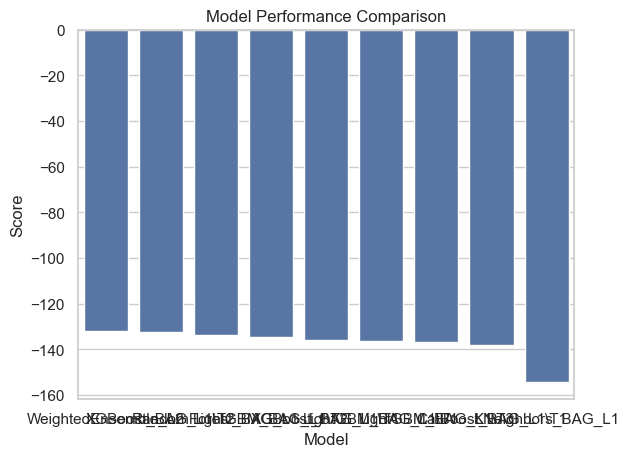

In [91]:
model_4_leaderboard = model_4.leaderboard(silent=True)
model_4_leaderboard.head(10)
sns.set_theme(style="whitegrid")
sns.barplot(x="model", y="score_val", data=model_4_leaderboard)
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.savefig('img/model4_leaderboard.png')
plt.show()

In [ ]:
#Create a line plot showing the top model score for the three (or more) training runs during the project.
print(model_4)

In [ ]:
model_4_predictions = model_4.predict(test.drop(columns=['datetime']))
model_4_predictions[model_4_predictions < 0] = 0
submission_4 = pd.read_csv("sampleSubmission.csv")
submission_4['count'] = model_4_predictions
submission_4.to_csv("submission_new_hpams.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpams.csv -m "0905_4"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|▍         | 8.00k/195k [00:00<00:06, 29.9kB/s]
 49%|████▉     | 96.0k/195k [00:00<00:00, 313kB/s] 
100%|██████████| 195k/195k [00:02<00:00, 93.5kB/s]


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

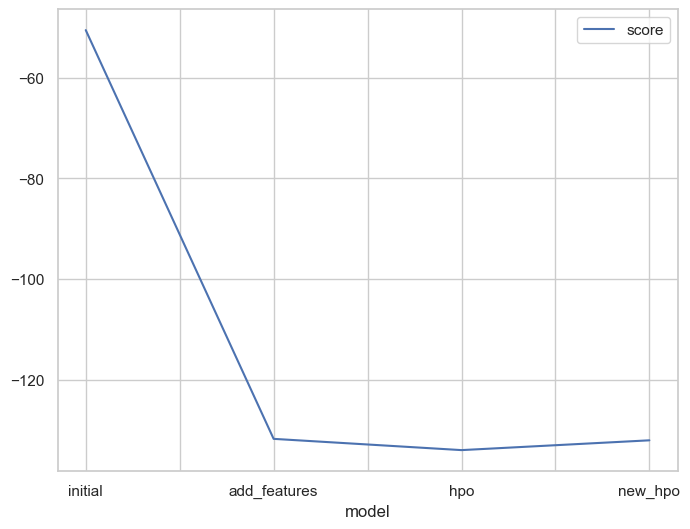

In [88]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo", "new_hpo"],
        "score": [-50.511910, -131.792003, -134.029602, -132.083212 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

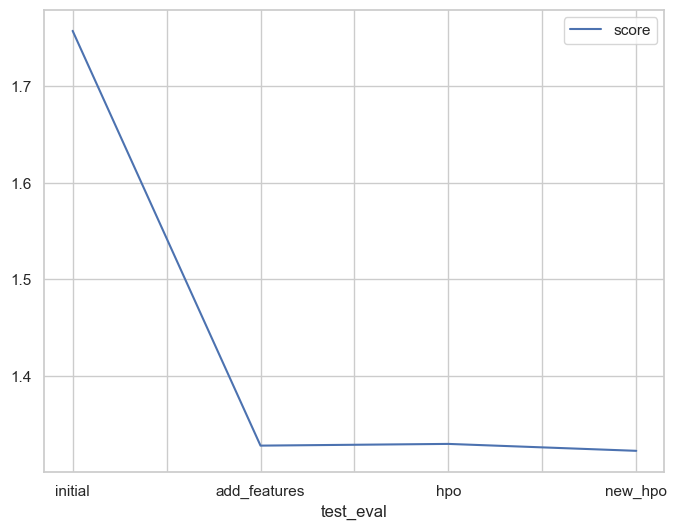

In [87]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo", "new_hpo"],
        "score": [1.75757, 1.32783, 1.32961, 1.32244]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_test_score.png')

### Hyperparameter table

In [89]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({"model": ["initial", "add_features", "hpo", "new_hpo"], 
              "scheduler": ["default", "local", "local", "local"],
              "num_trials": ["default", "8", "10", "10"],
              "presets": ["best_quality", "good_quality", "experimental_quality", "best_quality"],
              "score": [1.75757, 1.32783, 1.32961, 1.32244]
})

,model,scheduler,num_trials,presets,score
0,initial,default,default,best_quality,1.75757
1,add_features,local,8,good_quality,1.32783
2,hpo,local,10,experimental_quality,1.32961
3,new_hpo,local,10,best_quality,1.32244
